In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
data = pd.read_csv('data.csv')
data.head()

,var0,var1,Var2,var3,var4,var5,var6,var7,var8,var9,var10,target
0,6.0,0.24,0.27,1.9,0.048,40.0,170.0,0.99380,3.64,0.54,10.00,7.0
1,6.5,0.29,0.31,1.7,0.035,24.0,79.0,0.99053,3.27,0.69,11.40,7.0
2,5.3,0.40,0.25,3.9,0.031,45.0,130.0,0.99072,3.31,0.58,11.75,7.0
3,8.3,0.20,0.49,1.7,0.038,38.0,167.0,0.99390,3.05,0.37,10.10,6.0
4,6.9,0.19,0.35,13.5,0.038,49.0,118.0,0.99546,3.00,0.63,10.70,6.0


### Cleaning Data

In [3]:
# Type of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898 entries, 0 to 3897
Data columns (total 12 columns):
var0      3898 non-null float64
var1      3898 non-null float64
Var2      3898 non-null float64
var3      3898 non-null float64
var4      3898 non-null float64
var5      3898 non-null object
var6      3898 non-null float64
var7      3898 non-null float64
var8      3896 non-null float64
var9      3898 non-null float64
var10     3898 non-null float64
target    3897 non-null float64
dtypes: float64(11), object(1)
memory usage: 365.6+ KB


By looking the data, we observe the following:
- The column var5 is object type but actually has numeric values.
- Var8 and target does not have as many observations as the others.

In [4]:
# Transform var 5 into numeric
data['var5'] = pd.to_numeric(data['var5'], errors = 'coerce')

data.describe()

,var0,var1,Var2,var3,var4,var5,var6,var7,var8,var9,var10,target
count,3898.000000,3898.000000,3898.0000,3898.000000,3898.000000,3896.000000,3898.000000,3898.000000,3896.000000,3898.000000,3898.000000,3897.000000
mean,6.857478,0.277378,0.3341,6.405028,0.045759,35.439682,138.313109,0.994045,3.188475,0.488982,10.506904,5.877342
std,0.862851,0.099444,0.1212,5.097639,0.021422,17.113851,42.446527,0.003007,0.152692,0.113755,1.225731,0.896229
min,-1.000000,0.080000,0.0000,-2.000000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,-1.000000
25%,6.300000,0.210000,0.2700,1.700000,0.036000,24.000000,108.000000,0.991740,3.080000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.3200,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.3900,9.900000,0.050000,46.000000,167.000000,0.996120,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.6600,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,11.000000


In [5]:
# Missing values?
data.isnull().sum().to_frame(name = "# of missing values").T

,var0,var1,Var2,var3,var4,var5,var6,var7,var8,var9,var10,target
# of missing values,0,0,0,0,0,2,0,0,2,0,0,1


There are **5 missing values** in total located in var5, var8 and target

Since tha missing values cases represent a tiny proportion of total cases (< 1%), we can omit them and continue.

In [6]:
# Store missing values for a posible next investigation
row_na = data[data.isna().any(axis=1)]

# Omit missing values
clean_data = data.dropna()
print(clean_data.isna().any()) # No missing values

var0      False
var1      False
Var2      False
var3      False
var4      False
var5      False
var6      False
var7      False
var8      False
var9      False
var10     False
target    False
dtype: bool


### Variable Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A77C22FF08>,
      dtype=object)

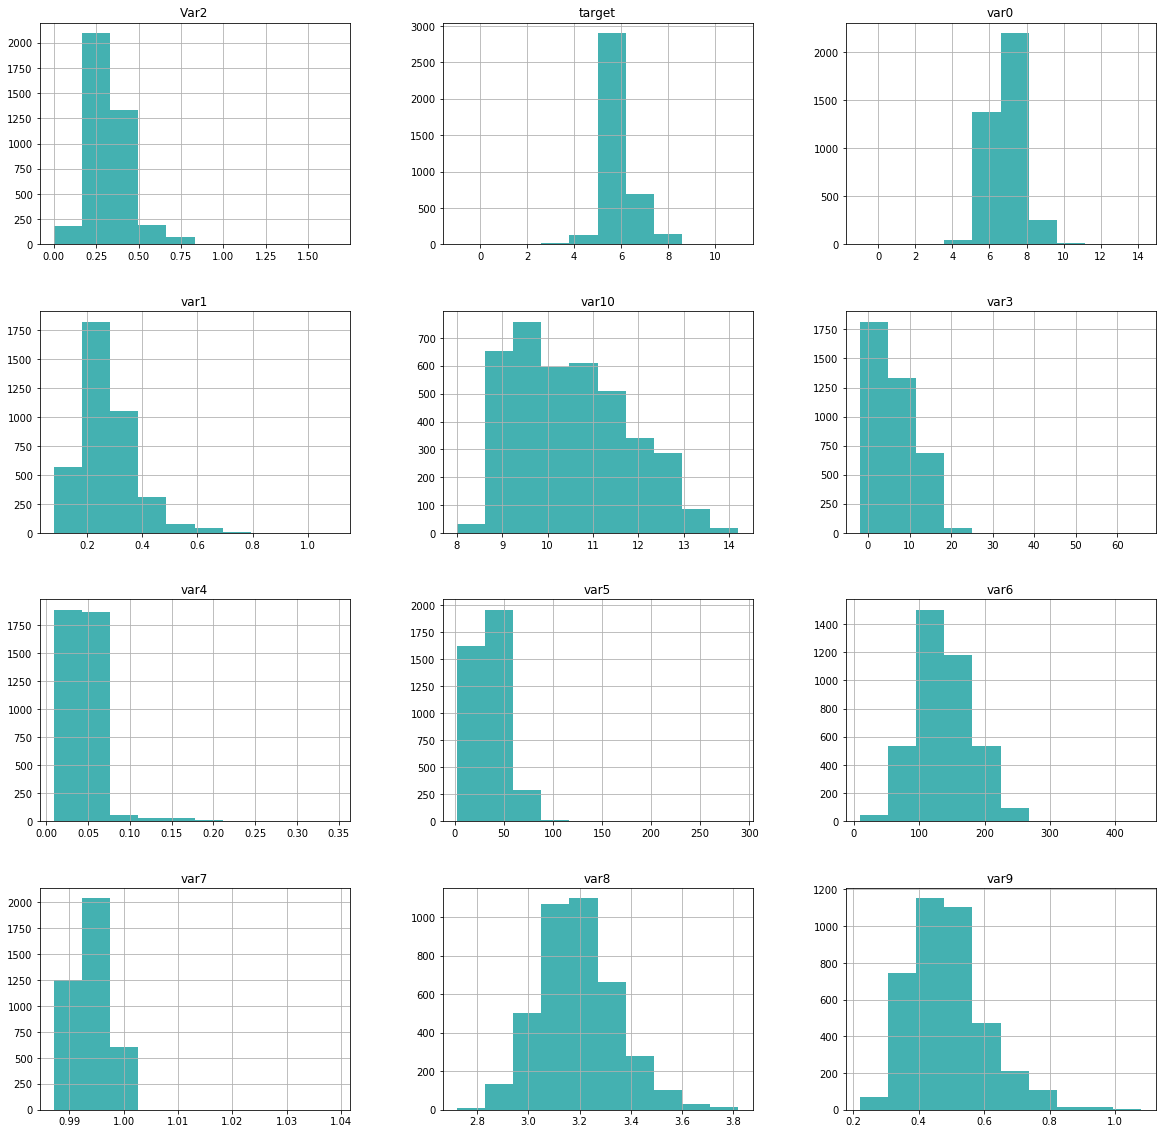

In [7]:
# Data Visualization - Histogram
clean_data.hist(figsize=(20,20), color="#44B1B1") # Distribucion anormal?

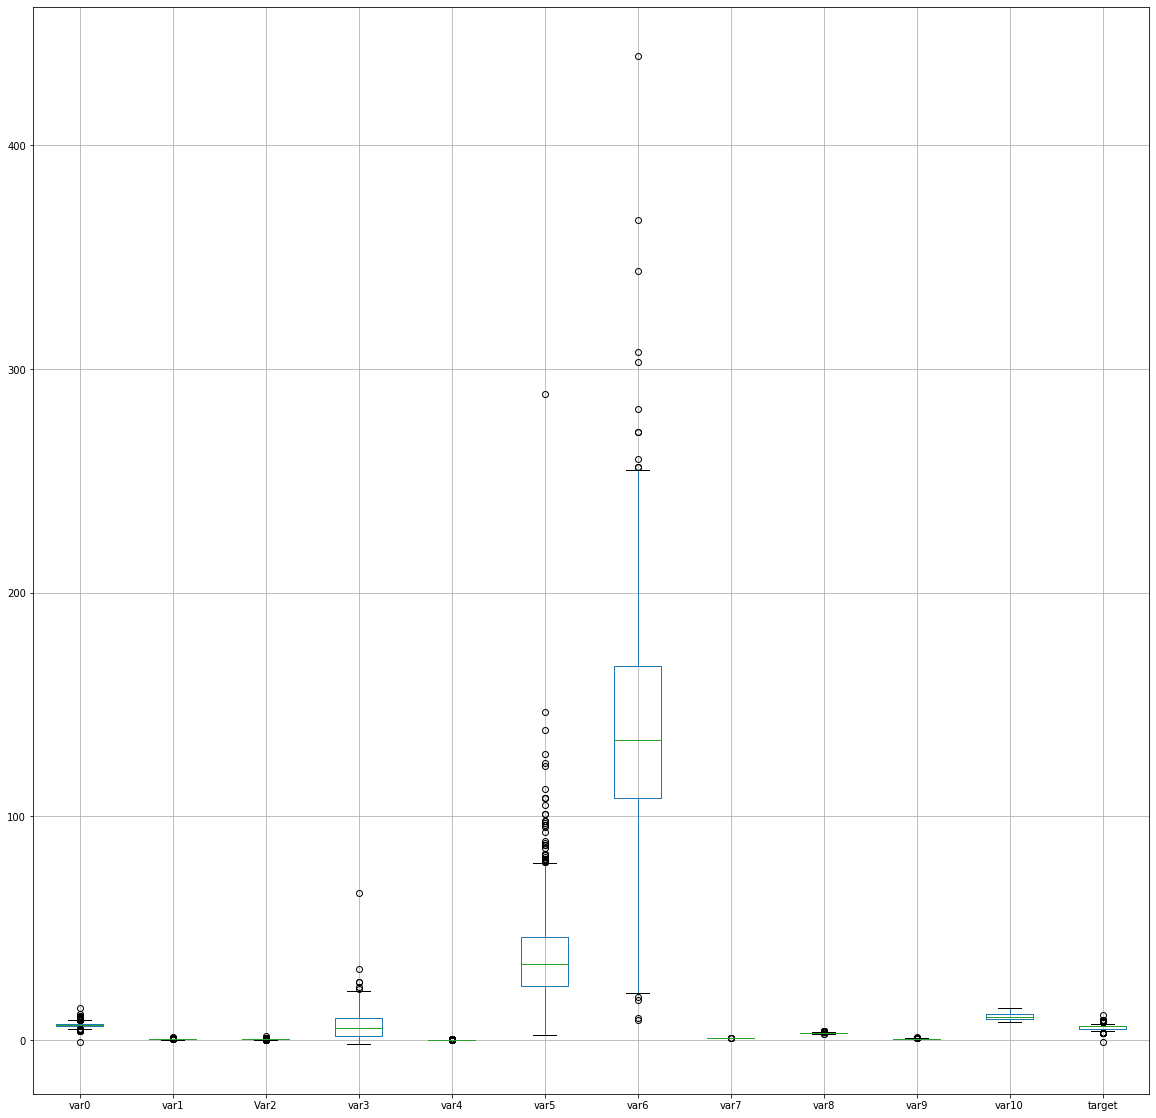

In [8]:
# Data Visualization - Box plot
clean_data.boxplot(figsize=(20,20)) # Variables con muchos outliers y diferentes escalas

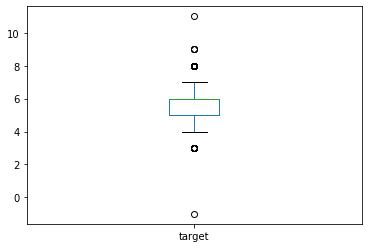

In [9]:
# Analyze variable target
clean_data['target'].value_counts().sort_index()
clean_data.plot(y = 'target', kind = 'box') #valores -1 y 11 outliers

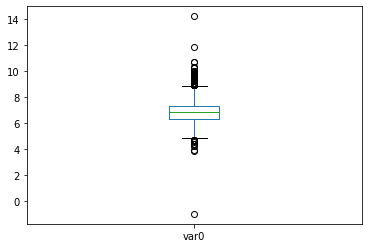

In [10]:
# Analyze variable var0
clean_data.plot(y = 'var0', kind = 'box') #valor negativo outlier

In [11]:
# Store outlier cases for possible next investigation
row_outlier = data[(data['target'] < 0) | (data['target'] > 10) | (data['var0'] < 0)]

# Remove outliers
clean_data = clean_data.drop(row_outlier.index)
clean_data.shape # Clean_data: 3890 observations

(3890, 12)

In [12]:
# Normal distribution
from scipy import stats

def normality_test(data):
    for i in data.columns:
        v, p = stats.shapiro(data[i])
        if p < .05:
            print('Hay evidencia de No-Normalidad en la distribucion de la variable ' + str(i) )
        else:
            print('Hay evidencia de Normalidad en la distribucion de la variable ' + str(i) )

normality_test(clean_data)

Hay evidencia de No-Normalidad en la distribucion de la variable var0
Hay evidencia de No-Normalidad en la distribucion de la variable var1
Hay evidencia de No-Normalidad en la distribucion de la variable Var2
Hay evidencia de No-Normalidad en la distribucion de la variable var3
Hay evidencia de No-Normalidad en la distribucion de la variable var4
Hay evidencia de No-Normalidad en la distribucion de la variable var5
Hay evidencia de No-Normalidad en la distribucion de la variable var6
Hay evidencia de No-Normalidad en la distribucion de la variable var7
Hay evidencia de No-Normalidad en la distribucion de la variable var8
Hay evidencia de No-Normalidad en la distribucion de la variable var9
Hay evidencia de No-Normalidad en la distribucion de la variable var10
Hay evidencia de No-Normalidad en la distribucion de la variable target


In [13]:
# Box Cox transformation: Logarithmic transformation
def log_data(data):
    log_data = dict()
    for i in data.columns:
        log_data[i] = clean_data[i].apply(lambda x: np.log(x+1)) #log(x+1) para el posible caso de x = 0
    log_data = pd.DataFrame(log_data)
    return log_data
                    
log_data = log_data(clean_data)

# Normal distribution for transformed variables?
normality_test(log_data)

Hay evidencia de No-Normalidad en la distribucion de la variable var0
Hay evidencia de No-Normalidad en la distribucion de la variable var1
Hay evidencia de No-Normalidad en la distribucion de la variable Var2
Hay evidencia de No-Normalidad en la distribucion de la variable var3
Hay evidencia de No-Normalidad en la distribucion de la variable var4
Hay evidencia de No-Normalidad en la distribucion de la variable var5
Hay evidencia de No-Normalidad en la distribucion de la variable var6
Hay evidencia de No-Normalidad en la distribucion de la variable var7
Hay evidencia de No-Normalidad en la distribucion de la variable var8
Hay evidencia de No-Normalidad en la distribucion de la variable var9
Hay evidencia de No-Normalidad en la distribucion de la variable var10
Hay evidencia de No-Normalidad en la distribucion de la variable target


Transformed variables do not have normal distribution either. So, we can not use linear regression model in the upcoming part of comparing models.

Before we decide which models to use, let's see correlation between variables and we will use Spearman Method because it works better for no-normality scenarios.

In [14]:
# Spearman Correlation
clean_data.corr(method = 'spearman')

,var0,var1,Var2,var3,var4,var5,var6,var7,var8,var9,var10,target
var0,1.000000,-0.043595,0.310612,0.113845,0.090656,-0.020100,0.122949,0.276470,-0.415853,-0.009104,-0.107499,-0.080753
var1,-0.043595,1.000000,-0.151242,0.103513,-0.005105,-0.088287,0.111127,0.010752,-0.040198,-0.023226,0.029614,-0.201873
Var2,0.310612,-0.151242,1.000000,0.037740,0.046724,0.089104,0.099397,0.106089,-0.152966,0.085754,-0.039812,0.022312
var3,0.113845,0.103513,0.037740,1.000000,0.220064,0.348024,0.427588,0.779294,-0.184145,-0.003464,-0.441356,-0.074509
var4,0.090656,-0.005105,0.046724,0.220064,1.000000,0.163222,0.368790,0.502299,-0.051775,0.095023,-0.566504,-0.319449
var5,-0.020100,-0.088287,0.089104,0.348024,0.163222,1.000000,0.613985,0.325797,-0.014189,0.038061,-0.272832,0.031212
var6,0.122949,0.111127,0.099397,0.427588,0.368790,0.613985,1.000000,0.567934,-0.016702,0.146378,-0.483298,-0.194248
var7,0.276470,0.010752,0.106089,0.779294,0.502299,0.325797,0.567934,1.000000,-0.116830,0.097417,-0.819171,-0.345403
var8,-0.415853,-0.040198,-0.152966,-0.184145,-0.051775,-0.014189,-0.016702,-0.116830,1.000000,0.139822,0.155667,0.115526
var9,-0.009104,-0.023226,0.085754,-0.003464,0.095023,0.038061,0.146378,0.097417,0.139822,1.000000,-0.048303,0.037359


There are some strong correlations that are worth to be mentioned, i.e. var3 and var7(.779), var7 and var10(-.819); for target variable, there are strong correlations with var10 (.44) and var7 (-.34).

###  Compare models to predict target variable

The response variable 'target' is numeric type with discrete values over [3,9] then we can consider these values as levels, or factors.

The models selected come from the Multi-class classification Models, i.e. **K-Nearest Neighbors, Decision Tree, Random Forest**.

I decide to start my analysis with the model of **Random Forest** for the following reasons:
- Many predictors and this model consider all of them through different conditions.
- It captures no linear relationship between independent and response variables.
- Scaling data is not needed.
- Better estimations than decision tree model.

However, there are some limitations:
- Complex model: harder to explain and interpret results.
- Not good for detailed insight.

In [15]:
# Separate columns: features and target
features = clean_data.columns[:-1]
target = clean_data.columns[-1]

# Import train_test_split to split data
from sklearn.model_selection import train_test_split

# Set the seed
seed= 42

# Split data: train set (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(clean_data[features], clean_data[target], test_size=0.3, random_state = seed)

In [16]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# rf Model
rf = RandomForestClassifier(random_state = seed)

# Training set
rf.fit(X_train, y_train)

# Prediction
y_pred = rf.predict(X_test)

# Model Performance: Accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.62


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [17]:
# Cross-Validation (k = 10-fold)

from sklearn.model_selection import cross_val_score

# Cross Validation Model for Random Forest
cv_rf = cross_val_score(rf, clean_data[features], clean_data[target], cv=10)

# Accuracy of prediction
mean_accuracy = cv_rf.mean()

print("Cross-validation accuracy: {:.2f}".format(mean_accuracy))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Cross-validation accuracy: 0.66


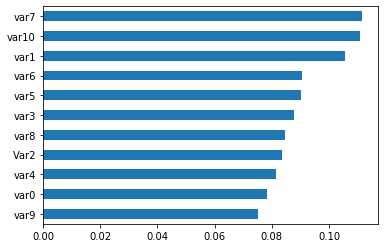

In [18]:
# Variables importance in Random Forest Model
importances_rf = pd.Series(rf.feature_importances_, index = clean_data[features].columns)

# Sorting
sorted_importances_rf = importances_rf.sort_values()

# Plot
sorted_importances_rf.plot(kind = 'barh')

According to the Random Forest Model: var10, var7 y var1 are the main variables to estimate the value of target. The sum of their importances reached about 35%.

### Comparing performance with other models

To evaluate performance of Random Forest, I will a make a comparison with other classification model such as Logistic Regression, K-Nearest Neighbors and Decision Tree.

The metric of comparison will be the accuracy of predictions using the two model validation employed before: Spliting data and Cross-Validation. Additionally, due to the Bias-Variance problem, the variance of models will be evaluated with the metric Root Mean Square Error [RMSE].

In [19]:
# Comparing models: Split data (70% training, 30% test)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(clean_data[features], clean_data[target], test_size=0.3, random_state=seed)

# Models
lr = LogisticRegression(random_state = seed)
knn = KNN()
dt = DecisionTreeClassifier(random_state = seed)
rf = RandomForestClassifier(random_state = seed)

classifiers = [('Logistic Regression', lr),
               ('K-Nearest Neigbors', knn),
               ('Classification Tree', dt),
               ('Random Forest', rf)]

# Evaluate each model
for clf_name, clf in classifiers:
    # training set
    clf.fit(X_train, y_train)
    # test set
    y_pred = clf.predict(X_test)
    # Models accuracy
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression : 0.514
K-Nearest Neigbors : 0.446
Classification Tree : 0.609
Random Forest : 0.618


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
# Comparing models: Cross-Validation (10-fold)

from sklearn.model_selection import cross_val_score

# Cross Validation Models
cv_lr = cross_val_score(lr, clean_data[features], clean_data[target], cv=10) 
cv_knn = cross_val_score(knn, clean_data[features], clean_data[target], cv=10) 
cv_dt = cross_val_score(dt, clean_data[features], clean_data[target], cv=10) 
cv_rf = cross_val_score(rf, clean_data[features], clean_data[target], cv=10) 

CVs = [('CV Logistic Regression', cv_lr),
               ('CV K-Nearest Neigbors', cv_knn),
               ('CV Classification Tree', cv_dt),
               ('CV Random Forest', cv_rf)]

# Evaluate each model
for clf_name, cv_scores in CVs:
    # accuracy
    mean_accuracy = cv_scores.mean()
    # Models accuracy
    print('{:s} : {:.3f}'.format(clf_name, mean_accuracy))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logi

CV Logistic Regression : 0.528
CV K-Nearest Neigbors : 0.477
CV Classification Tree : 0.586
CV Random Forest : 0.657


In [21]:
# Comparing models: Variance (RMSE)

from sklearn.metrics import mean_squared_error as MSE

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(clean_data[features], clean_data[target], test_size=0.3, random_state=seed)

# Models
lr = LogisticRegression(random_state = seed)
knn = KNN()
dt = DecisionTreeClassifier(random_state = seed)
rf = RandomForestClassifier(random_state = seed)

mse_classifiers = [('RMSE Logistic Regression', lr),
               ('RMSE K-Nearest Neigbors', knn),
               ('RMSE Classification Tree', dt),
               ('RMSE Random Forest', rf)]

# Evaluate each models
for clf_name, clf in mse_classifiers:
    # training set
    clf.fit(X_train, y_train)
    # test set
    y_pred = clf.predict(X_test)
    # Models RMSE
    rmse_test = MSE(y_test, y_pred)**(1/2)
    print('{:s} : {:.2f}'.format(clf_name, rmse_test))

RMSE Logistic Regression : 0.83


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RMSE K-Nearest Neigbors : 0.98
RMSE Classification Tree : 0.85
RMSE Random Forest : 0.76


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Random Forest is a powerful classification model with great advantages for the data set analyzed.**

**Performance:** 
- The model accuracy reached **62%** in the test set using the splitting data method and **66%** employing cross-validation, thereby the random forest performance was better compared to other models. 
- By estimating the 'Generalization Error' of the model through the metric RMSE, the variance found was **0.76** which is lower than the variance of other models. This result indicates that there are no large differences in error between the results obtained from the training and the test set.